# K Clustering Analysis on Combined Arrays

We will perform a K Cluster analysis on the combined data. First we apply principle component analysis (PCA) on the data to reduce the data from 12 dimensions to 2, to visualize the 2 dimensional floor mapping. For now, we will assume there is a single source producing data points.

## Imports

In [90]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

## clean_data
clean_data takes the path to the combined data file as a string. It parses .csv file and organizes it into a 12 dimension numpy array. clean_data makes the assumption that there is a single source. Dimensions 0-2 are array 0's xyz values.<br>Dimensions 3-5 are array 1's xyz values. <br>Dimensions 6-8 are array 2's xyz values. <br>Dimensions 9-11 are array 3's xyz values.

In [81]:
def clean_data(path):
    data = pd.read_csv(path)
    
    combined = np.empty([(int)(len(data)/6), 12])
    
    #assuming there in only 1 source
    data_index = 0
    combined_index = 0
    
    while(data_index + 5 <= len(data)):

        f0 = (float)(data.iloc[data_index]['xyz 1'][1:data.iloc[data_index]['xyz 1'].find(',')])
        f1 = (float)(data.iloc[data_index]['xyz 1'][data.iloc[data_index]['xyz 1'].find(' ') + 1:data.iloc[data_index]['xyz 1'].rfind(',')])
        f2 = (float)(data.iloc[data_index]['xyz 1'][data.iloc[data_index]['xyz 1'].rfind(' ') + 1:data.iloc[data_index]['xyz 1'].find(']')])
        f3 = (float)(data.iloc[data_index]['xyz 2'][1:data.iloc[data_index]['xyz 2'].find(',')])
        f4 = (float)(data.iloc[data_index]['xyz 2'][data.iloc[data_index]['xyz 2'].find(' ') + 1:data.iloc[data_index]['xyz 2'].rfind(',')])
        f5 = (float)(data.iloc[data_index]['xyz 2'][data.iloc[data_index]['xyz 2'].rfind(' ') + 1:data.iloc[data_index]['xyz 2'].find(']')])     
        f6 = (float)(data.iloc[data_index + 5]['xyz 1'][1:data.iloc[data_index + 5]['xyz 1'].find(',')])
        f7 = (float)(data.iloc[data_index + 5]['xyz 1'][data.iloc[data_index + 5]['xyz 1'].find(' ') + 1:data.iloc[data_index + 5]['xyz 1'].rfind(',')])
        f8 = (float)(data.iloc[data_index + 5]['xyz 1'][data.iloc[data_index + 5]['xyz 1'].rfind(' ') + 1:data.iloc[data_index + 5]['xyz 1'].find(']')])
        f9 = (float)(data.iloc[data_index + 5]['xyz 2'][1:data.iloc[data_index + 5]['xyz 2'].find(',')])
        f10 = (float)(data.iloc[data_index + 5]['xyz 2'][data.iloc[data_index + 5]['xyz 2'].find(' ') + 1:data.iloc[data_index + 5]['xyz 2'].rfind(',')])
        f11 = (float)(data.iloc[data_index + 5]['xyz 2'][data.iloc[data_index + 5]['xyz 2'].rfind(' ') + 1:data.iloc[data_index + 5]['xyz 2'].find(']')])
        
        combined[combined_index] = [f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11]
        
        combined_index += 1
        data_index += 6
        
    return combined

In [82]:
data = clean_data('/Users/ardelalegre/CSE4223-ODAS/data/combined/recordingWednesday, March 25, 2020 01:05:3_0.csv')

In [87]:
data.shape

(8334, 12)

## PCA Transform

In [92]:
pca = decomposition.PCA(n_components=2)
pca.fit(data)
data_2D = pca.fit_transform(data) 

## K Cluster Analysis

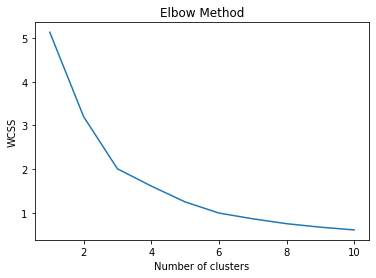

In [93]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_2D)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

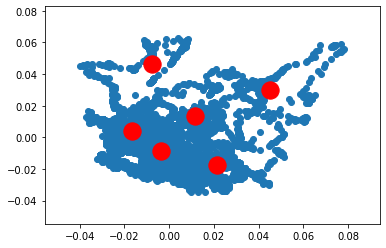

In [95]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_2D)
plt.scatter(data_2D[:,0], data_2D[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()